In [1]:
import pandas as pd
import numpy as np

from helper import *

import matplotlib.pyplot as plt
import seaborn as sns

import json
import pickle

pd.set_option('max_columns', 100)

In [2]:
df_origin = pd.read_csv('../data/historical_data/integrated_data.csv')
df_origin.head()

c:\Users\DNJ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,35,36,39,41,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,raceid,racedate,KettoNum,KisyuCode,Time,KakuteiJyuni,Wakuban,Umaban,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,BanusiCode,Futan,Blinker,MinaraiCD,BaTaijyu,IJyoCD,NyusenJyuni,DochakuKubun,DochakuTosu,ChakusaCD,ChakusaCDP,Ninki,Honsyokin,RecordUpKubun,DMGosaP,DMGosaM,DMJyuni,KyakusituKubun,RaceInfo$YoubiCD,RaceInfo$TokuNum,RaceInfo$Kakko,RaceInfo$KakkoEng,RaceInfo$Kubun,RaceInfo$Nkai,GradeCD,JyokenInfo$SyubetuCD,JyokenInfo$KigoCD,JyokenInfo$JyuryoCD,JyokenInfo$JyokenCD$1,JyokenInfo$JyokenCD$2,JyokenInfo$JyokenCD$3,JyokenInfo$JyokenCD$4,JyokenInfo$JyokenCD$5,Kyori,TrackCD,CourseKubunCD,Honsyokin$1,Honsyokin$2,Honsyokin$3,Honsyokin$4,Honsyokin$5,Honsyokin$6,Fukasyokin$1,Fukasyokin$2,Fukasyokin$3,Fukasyokin$4,Fukasyokin$5,TorokuTosu,SyussoTosu,NyusenTosu,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD,Zogen
0,2008-01-05 01:06,2008-01-05,2005107051,1031,752,8,1,1,0,2,1,3,3,1,437,898009,540,0,0,428,0,8,0,0,112,,9,0,0,0,0,9,2,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,12.0
1,2008-01-05 01:06,2008-01-05,2005102028,733,739,1,1,2,0,2,1,3,3,1,138,498800,540,0,0,450,0,1,0,0,,,4,50000,0,4,4,8,1,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,-10.0
2,2008-01-05 01:06,2008-01-05,2005104156,684,742,3,2,3,0,2,1,3,3,1,1054,486800,540,0,0,458,0,3,0,0,134,,5,13000,0,4,4,2,3,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,4.0
3,2008-01-05 01:06,2008-01-05,2005105319,672,749,6,2,4,0,2,1,3,3,1,1081,515800,540,0,0,402,0,6,0,0,212,,14,0,0,7,23,15,4,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,-10.0
4,2008-01-05 01:06,2008-01-05,2005101044,663,739,2,3,5,0,2,1,3,3,1,1088,163002,540,0,0,482,0,2,0,0,H,,6,20000,0,0,0,6,3,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,2.0


In [3]:
extended_data = pd.read_csv('../data/historical_data/extended_data.csv', index_col=0)
extended_data.head()

,Kyori,Track_type,Weather
raceid,,,
2018-05-26 01:05,1600.0,Dirt Standard,Cloudy
2018-05-26 01:08,1800.0,Dirt Standard,Cloudy
2018-05-26 02:05,1400.0,Turf Firm,Cloudy
2018-05-26 02:08,1400.0,Dirt Standard,Cloudy
2018-05-26 03:05,1800.0,Turf Firm,Cloudy


# Select some relevant columns

See `Horse-Race-Data-Description.xlsx` for more details

In [5]:
essential_cols = [
'raceid',
'racedate',
'Time', # THỜI GIAN
'KakuteiJyuni', # THỨ TỰ VỀ ĐÍCH
'DochakuKubun', # cùng về đích hay không
'DochakuTosu', # số lượng cùng về 3 giá trị
'Umaban', # số của ngựa: 18 giá trị
'KettoNum', # mã số đăng ký huyết thống
'UmaKigoCD', # loại ngựa (nguồn gốc) 8 giá trị
'SexCD', # giới tính: 3 giá trị
'HinsyuCD', # Product code: 2 giá trị
'KeiroCD', # màu lông 8 giá trị
'Barei', # tuổi ngựa
'TozaiCD', # khu vực: 4 giá trị
'BanusiCode', # owner code
'ChokyosiCode', # code huấn luyện viên
'Futan', # khối lượng đảm nhiệm, đơn vị 0.1kg
'Blinker', # sử dụng bịt che mắt hay không
'KisyuCode', # Jockey code link với bảng 4
'MinaraiCD', # code thành tích jockey
'BaTaijyu', # khối lượng ngựa
'Zogen', # tăng hoặc giảm khối lượng
'IJyoCD', # CODE PHÂN LOẠI BẤT THƯỜnG
'Honsyokin', # TIỀN THƯỞNG
'RaceInfo$YoubiCD', # ngày trong tuần hoặc holiday
'GradeCD', # mã cuộc đua đặc biệt
'JyokenInfo$JyuryoCD', # Weight type code
'Kyori', # CỰ LY theo m
'TrackCD', # loại sân
'TenkoBaba$TenkoCD', # MÃ THỜI TIẾT
'TenkoBaba$SibaBabaCD', # TÌNH TRẠNG SÂN CỎ
'TenkoBaba$DirtBabaCD', # TÌNH TRẠNG SÂN ĐẤT
]

In [6]:
df = df_origin[essential_cols].astype((dict([(col, str) for col in ['KettoNum','KisyuCode','BanusiCode','ChokyosiCode']])))
df.head(3)

,raceid,racedate,Time,KakuteiJyuni,DochakuKubun,DochakuTosu,Umaban,KettoNum,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,BanusiCode,ChokyosiCode,Futan,Blinker,KisyuCode,MinaraiCD,BaTaijyu,Zogen,IJyoCD,Honsyokin,RaceInfo$YoubiCD,GradeCD,JyokenInfo$JyuryoCD,Kyori,TrackCD,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD
0,2008-01-05 01:06,2008-01-05,752,8,0,0,1,2005107051,0,2,1,3,3,1,898009,437,540,0,1031,0,428,12.0,0,0,1.0,,3.0,1200.0,24.0,2.0,0.0,1.0
1,2008-01-05 01:06,2008-01-05,739,1,0,0,2,2005102028,0,2,1,3,3,1,498800,138,540,0,733,0,450,-10.0,0,50000,1.0,,3.0,1200.0,24.0,2.0,0.0,1.0
2,2008-01-05 01:06,2008-01-05,742,3,0,0,3,2005104156,0,2,1,3,3,1,486800,1054,540,0,684,0,458,4.0,0,13000,1.0,,3.0,1200.0,24.0,2.0,0.0,1.0


In [7]:
df.dtypes

raceid                   object
racedate                 object
Time                      int64
KakuteiJyuni              int64
DochakuKubun              int64
DochakuTosu               int64
Umaban                    int64
KettoNum                 object
UmaKigoCD                 int64
SexCD                     int64
HinsyuCD                  int64
KeiroCD                   int64
Barei                     int64
TozaiCD                   int64
BanusiCode               object
ChokyosiCode             object
Futan                     int64
Blinker                   int64
KisyuCode                object
MinaraiCD                 int64
BaTaijyu                  int64
Zogen                   float64
IJyoCD                    int64
Honsyokin                 int64
RaceInfo$YoubiCD        float64
GradeCD                  object
JyokenInfo$JyuryoCD     float64
Kyori                   float64
TrackCD                 float64
TenkoBaba$TenkoCD       float64
TenkoBaba$SibaBabaCD    float64
TenkoBab

# Null values

In [8]:
df.isna().sum(axis=0)

raceid                     0
racedate                5165
Time                       0
KakuteiJyuni               0
DochakuKubun               0
DochakuTosu                0
Umaban                     0
KettoNum                   0
UmaKigoCD                  0
SexCD                      0
HinsyuCD                   0
KeiroCD                    0
Barei                      0
TozaiCD                    0
BanusiCode                 0
ChokyosiCode               0
Futan                      0
Blinker                    0
KisyuCode                  0
MinaraiCD                  0
BaTaijyu                   0
Zogen                    339
IJyoCD                     0
Honsyokin                  0
RaceInfo$YoubiCD        5165
GradeCD                 5165
JyokenInfo$JyuryoCD     5165
Kyori                   5165
TrackCD                 5165
TenkoBaba$TenkoCD       5165
TenkoBaba$SibaBabaCD    5165
TenkoBaba$DirtBabaCD    5165
dtype: int64

In [9]:
df['raceid'][df['racedate'].isna()].head(1), df['raceid'][df['racedate'].isna()].tail(1)

(520498    2018-05-26 01:05
 Name: raceid, dtype: object,
 525662    2018-07-01 12:07
 Name: raceid, dtype: object)

In [10]:
extended_data['TrackCD'] = extended_data['Track_type'].apply(lambda x: x.split()[0])
extended_data.head()

,Kyori,Track_type,Weather,TrackCD
raceid,,,,
2018-05-26 01:05,1600.0,Dirt Standard,Cloudy,Dirt
2018-05-26 01:08,1800.0,Dirt Standard,Cloudy,Dirt
2018-05-26 02:05,1400.0,Turf Firm,Cloudy,Turf
2018-05-26 02:08,1400.0,Dirt Standard,Cloudy,Dirt
2018-05-26 03:05,1800.0,Turf Firm,Cloudy,Turf


In [11]:
def tracktype_map(code):
    if code == 0:
        return 'Not set'
    elif code < 23:
        return 'Turf'
    elif code < 30:
        return 'Dirt'
    elif code < 60:
        return 'Jump'
    else:
        return np.nan

In [12]:
df['TrackCD'] = df['TrackCD'].apply(tracktype_map)

In [13]:
naindex = df[df['racedate'].isna()].index
for idx in naindex:
    idx2 = df.loc[idx, 'raceid']
    df.loc[idx, 'Kyori'] = extended_data.loc[idx2, 'Kyori']
    df.loc[idx, 'TrackCD'] = extended_data.loc[idx2, 'TrackCD']


In [14]:
df.tail(2)

,raceid,racedate,Time,KakuteiJyuni,DochakuKubun,DochakuTosu,Umaban,KettoNum,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,BanusiCode,ChokyosiCode,Futan,Blinker,KisyuCode,MinaraiCD,BaTaijyu,Zogen,IJyoCD,Honsyokin,RaceInfo$YoubiCD,GradeCD,JyokenInfo$JyuryoCD,Kyori,TrackCD,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD
525661,2018-07-01 12:07,NaN,1202,8,0,0,14,2014102088,0,1,1,3,4,2,862009,1042,560,0,1155,1,456,-4.0,0,0,NaN,NaN,NaN,1900.0,Dirt,NaN,NaN,NaN
525662,2018-07-01 12:07,NaN,1220,14,0,0,15,2014106395,0,1,1,3,4,2,320030,425,570,0,1122,0,520,-2.0,0,0,NaN,NaN,NaN,1900.0,Dirt,NaN,NaN,NaN


In [15]:
# fill missing values in Zogen column by 0
df.fillna({'Zogen':0.0, 'GradeCD': ' '}, inplace=True)


is_abnormal_code = df['IJyoCD'] > 0
df.loc[is_abnormal_code,'Time'] = 0
df.loc[is_abnormal_code,'KakuteiJyuni'] = 0
# fill missing values (999, 0) in BaTaijyu
median_horse_weight = df['BaTaijyu'].median()
df['BaTaijyu'].replace([999,0], median_horse_weight, inplace=True)

# EDA

In [16]:
print(f"""Number of unique horses: {df['KettoNum'].nunique()}
Number of races: {df['raceid'].nunique()}
Number of jockeys: {df['KisyuCode'].nunique()}""")

Number of unique horses: 54759
Number of races: 36285
Number of jockeys: 470


In [17]:
df_race = df.groupby('raceid')
num_horses_in_race = df_race.agg({'raceid':'count'})

## Add some fields

In [18]:
df['Special race'] = df['GradeCD'].apply(lambda x: True if ord(x) > 64 and ord(x) < 70 else False)

df['Speed'] = df['Kyori']/df['Time']
df['Top 1'] = (df['KakuteiJyuni'] < 2) & (df['KakuteiJyuni'] > 0)
df['Top 3'] = (df['KakuteiJyuni'] < 4) & (df['KakuteiJyuni'] > 0)

df['Top 3 spec race'] = df['Top 3'] & df['Special race']

In [19]:
print('Max speed:',df['Speed'].max(), '\tMin speed:',df['Speed'].min())
df['Speed'].replace(np.inf, 0.0, inplace=True)
print('Max speed:',df['Speed'].max(), '\tMin speed:',df['Speed'].min())

Max speed: inf 	Min speed: 0.6103763987792472
Max speed: 1.858736059479554 	Min speed: 0.0


In [20]:
def fix_KakuteiJyuni(row):
    if row['KakuteiJyuni'] == 0:
        return 100.
    else:
        return (row['KakuteiJyuni'] - 1)/(num_horses_in_race.loc[row['raceid'], 'raceid']-1)*99 + 1

df['KakuteiJyuni_fixed'] = df.apply(fix_KakuteiJyuni, axis=1)

In [21]:
df[['KakuteiJyuni', 'KakuteiJyuni_fixed']].head()

,KakuteiJyuni,KakuteiJyuni_fixed
0,8,47.2
1,1,1.0
2,3,14.2
3,6,34.0
4,2,7.6


# Analyze horses

In [21]:
def gender_identify(group):
    min_ = group.min()
    if min_ != group.max():
        return 4
    else:
        return min_

In [24]:
df_valid = df[df['Speed']>0.]

In [23]:
df_horse = df_valid.groupby('KettoNum').agg({'SexCD':gender_identify,
                                        'HinsyuCD':'min',
                                        'KeiroCD':'min',
                                        'TozaiCD':'min',
                                        'Top 1':'sum',
                                        'Top 3':'sum',
                                        'Top 3 spec race':'sum',
                                        'Time':'mean',
                                        'Speed':'mean',
                                        'KakuteiJyuni':'min',
                                        'KakuteiJyuni_fixed':'mean',
                                        'KettoNum':'count',
                                        'Special race':'sum'})

In [24]:
df_horse.rename(columns={'KettoNum': 'Number of races','Special race': 'Number of spec races','KakuteiJyuni': 'Best achievement'}, inplace=True)
df_horse['Top 3 rate'] = df_horse['Top 3']/df_horse['Number of races']                   
df_horse['Top 3 spec rate'] = df_horse['Top 3 spec race']/df_horse['Number of spec races']                   
df_horse.head()

,SexCD,HinsyuCD,KeiroCD,TozaiCD,Top 1,Top 3,Top 3 spec race,Time,Speed,Best achievement,KakuteiJyuni_fixed,Number of races,Number of spec races,Top 3 rate,Top 3 spec rate
KettoNum,,,,,,,,,,,,,,,
1996110169,1,1,3,2,0,0,0,843.333333,1.662206,7,69.200000,3,3,0.000000,0.000000
1997103860,1,1,3,1,0,1,0,708.857143,1.693335,2,50.652521,7,1,0.142857,0.000000
1997105482,3,1,3,1,1,4,0,1970.857143,1.488194,1,23.846154,7,0,0.571429,NaN
1998100158,1,1,3,1,0,0,0,1042.333333,1.610584,9,67.000000,3,3,0.000000,0.000000
1998100265,3,1,4,2,1,1,1,1180.000000,1.659259,1,61.708013,9,9,0.111111,0.111111


In [25]:
horse_map = {'SexCD': {0: 'not set', 1: 'Male', 2: 'Female', 3: 'Castrated male', 4: 'Changed'},
             'HinsyuCD': {0: 'not set', 1: 'Thoroughbred', 2: '< 25% Arab blood'},
             'KeiroCD': {0:  'not set',
                         1:  'Brown hair',
                         2:  'Tochi chestnut hair',
                         3:  'Bald hair',
                         4:  'Black deer',
                         5:  'Blue deer hair',
                         6:  'Blue hair',
                         7:  'Eyelash',
                         8:  'Chestnut hair',
                         9:  'Deer hair',
                         10: 'Blue hair',
                         11: 'White hair'},
             'TozaiCD': {0: 'not set',
                         1: 'Miura Training Center',
                         2: 'Ritto Training Center',
                         3: 'From the region',
                         4: 'From abroad'}
             }


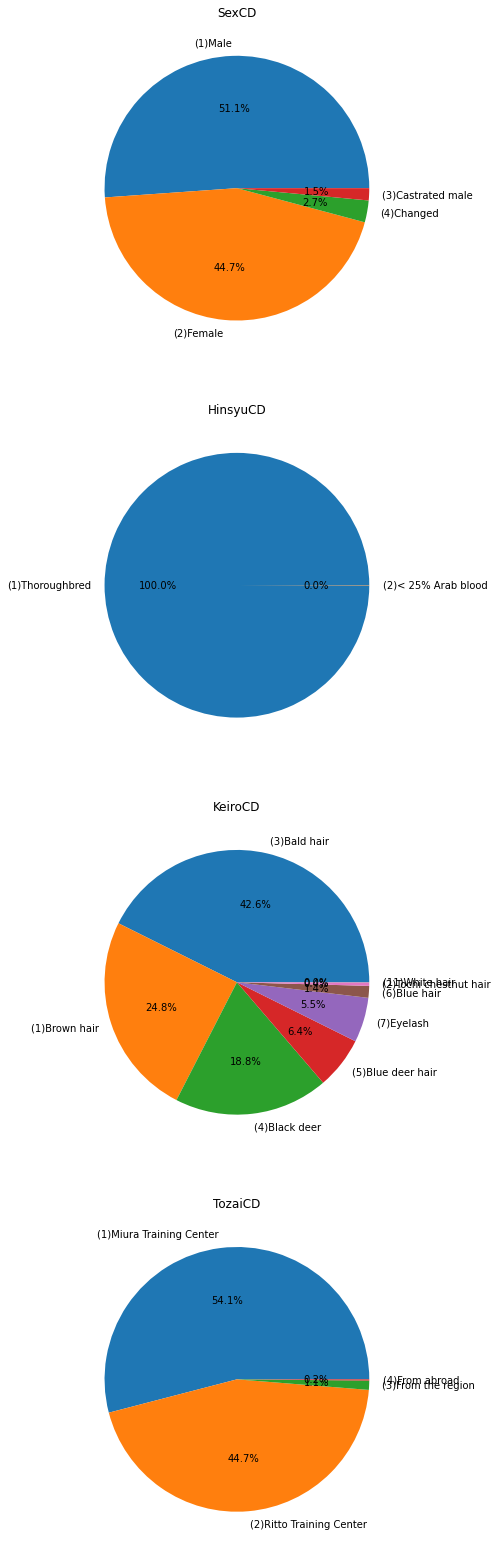

In [26]:
plt.figure(figsize=(7,28))
idx_ = 1
for col in ['SexCD', 'HinsyuCD', 'KeiroCD', 'TozaiCD']:
    data_ = df_horse[col].value_counts()
    plt.subplot(4,1,idx_)
    if col in horse_map:
        labels=[f'({i})'+horse_map[col][int(i)] for i in data_.index]
    else:
        labels=None
    plt.pie(x=data_, labels=labels, autopct='%1.1f%%')
    plt.title(col)
    idx_ += 1

In [27]:
print('Top 5 horses with most wins')
df_horse.sort_values('Top 1', ascending=False).head()

Top 5 horses with most wins


,SexCD,HinsyuCD,KeiroCD,TozaiCD,Top 1,Top 3,Top 3 spec race,Time,Speed,Best achievement,KakuteiJyuni_fixed,Number of races,Number of spec races,Top 3 rate,Top 3 spec rate
KettoNum,,,,,,,,,,,,,,,
2009102739,1,1,7,2,15,21,20,1503.882353,1.635543,1,21.303740,34,33,0.617647,0.606061
2012102013,1,1,3,2,12,18,16,1419.550000,1.645181,1,12.133687,20,18,0.900000,0.888889
2011101125,1,1,3,1,12,15,0,2255.363636,1.485667,1,19.289585,22,1,0.681818,0.000000
2009100301,2,1,3,2,11,17,13,760.827586,1.715784,1,22.712599,29,22,0.586207,0.590909
2008103552,1,1,3,2,11,17,15,727.529412,1.748844,1,4.074261,17,15,1.000000,1.000000


In [28]:
print('Top 5 horses with most top 3 award')
df_horse.sort_values('Top 3', ascending=False).head()

Top 5 horses with most top 3 award


,SexCD,HinsyuCD,KeiroCD,TozaiCD,Top 1,Top 3,Top 3 spec race,Time,Speed,Best achievement,KakuteiJyuni_fixed,Number of races,Number of spec races,Top 3 rate,Top 3 spec rate
KettoNum,,,,,,,,,,,,,,,
2010104176,1,1,3,1,7,30,4,1365.636364,1.567454,1,35.085204,77,14,0.389610,0.285714
2010101161,1,1,3,2,5,29,16,1103.224138,1.668389,1,32.952677,58,36,0.500000,0.444444
2009103405,1,1,3,2,4,27,8,1154.772727,1.611263,1,33.791702,88,40,0.306818,0.200000
2007102721,1,1,1,2,6,27,25,934.900000,1.647922,1,23.398791,40,36,0.675000,0.694444
2008104798,1,1,3,2,7,27,22,1179.708333,1.668713,1,24.260753,48,43,0.562500,0.511628


In [29]:
print('Top 5 horses with most top 3 special race award')
df_horse.sort_values('Top 3 spec race', ascending=False).head()

Top 5 horses with most top 3 special race award


,SexCD,HinsyuCD,KeiroCD,TozaiCD,Top 1,Top 3,Top 3 spec race,Time,Speed,Best achievement,KakuteiJyuni_fixed,Number of races,Number of spec races,Top 3 rate,Top 3 spec rate
KettoNum,,,,,,,,,,,,,,,
2007102721,1,1,1,2,6,27,25,934.900000,1.647922,1,23.398791,40,36,0.675000,0.694444
2005102633,3,1,1,2,5,25,23,1003.000000,1.690946,1,28.924680,50,48,0.500000,0.479167
2008104798,1,1,3,2,7,27,22,1179.708333,1.668713,1,24.260753,48,43,0.562500,0.511628
2009102739,1,1,7,2,15,21,20,1503.882353,1.635543,1,21.303740,34,33,0.617647,0.606061
2008104956,1,1,5,1,6,24,20,964.793103,1.689824,1,34.353184,58,51,0.413793,0.392157


In [30]:
print('Top experienced 5 horses with highest top 3 rate')
df_horse[df_horse['Number of races']>5].sort_values('Top 3 rate', ascending=False).head()

Top experienced 5 horses with highest top 3 rate


,SexCD,HinsyuCD,KeiroCD,TozaiCD,Top 1,Top 3,Top 3 spec race,Time,Speed,Best achievement,KakuteiJyuni_fixed,Number of races,Number of spec races,Top 3 rate,Top 3 spec rate
KettoNum,,,,,,,,,,,,,,,
2004103021,2,1,3,2,5,8,8,704.500000,1.741178,1,3.377941,8,8,1.0,1.0
2007103236,1,1,1,2,2,6,1,1101.833333,1.589214,1,10.575000,6,1,1.0,1.0
2008103552,1,1,3,2,11,17,15,727.529412,1.748844,1,4.074261,17,15,1.0,1.0
2015105106,2,1,3,1,3,8,5,951.875000,1.681706,1,6.927679,8,5,1.0,1.0
2009105084,1,1,3,2,3,6,5,1179.166667,1.638260,1,5.860407,6,5,1.0,1.0


In [31]:
df_horse.describe()

,SexCD,HinsyuCD,KeiroCD,TozaiCD,Top 1,Top 3,Top 3 spec race,Time,Speed,Best achievement,KakuteiJyuni_fixed,Number of races,Number of spec races,Top 3 rate,Top 3 spec rate
count,54589.000000,54589.000000,54589.000000,54589.000000,54589.000000,54589.000000,54589.000000,54589.000000,54589.000000,54589.000000,54589.000000,54589.000000,54589.000000,54589.000000,18162.000000
mean,1.556999,1.000421,3.079467,1.473703,0.665903,1.997655,0.525106,1002.570042,1.608821,5.281265,58.848155,9.543937,2.443148,0.140946,0.146661
std,0.660657,0.020522,1.566737,0.529857,1.258406,3.279738,1.713468,215.229985,0.049740,4.470172,21.295803,9.321106,5.818140,0.194135,0.214409
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,557.000000,1.059447,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,831.555556,1.577201,1.000000,42.672323,3.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,995.809524,1.609561,4.000000,57.539005,6.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,4.000000,2.000000,1.000000,3.000000,0.000000,1135.083333,1.641948,9.000000,75.411765,12.000000,2.000000,0.250000,0.250000
max,4.000000,2.000000,11.000000,4.000000,15.000000,30.000000,25.000000,3264.000000,1.795332,18.000000,100.000000,88.000000,69.000000,1.000000,1.000000


Text(0, 0.5, 'Top 3 rate')

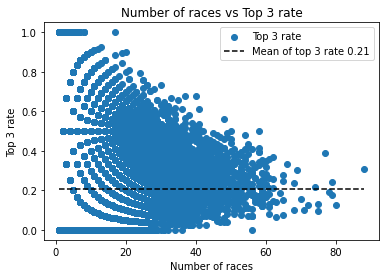

In [32]:
# Correct top 3 rate
plt.scatter(x='Number of races', y='Top 3 rate', data=df_horse)
mean_top3_rate = df_horse['Top 3'].sum()/df_horse['Number of races'].sum()
plt.hlines(y=mean_top3_rate,
            xmin=df_horse['Number of races'].min(),
            xmax=df_horse['Number of races'].max(),
            colors='k',
            linestyles='--',
            label=f'Mean of top 3 rate {np.round(mean_top3_rate, 2)}')
plt.legend()
plt.title('Number of races vs Top 3 rate')
plt.xlabel('Number of races')
plt.ylabel('Top 3 rate')

## Analyze horse characteristics

In [33]:
df_group_trackcd = df_valid.groupby('TrackCD', dropna=True) # drop rows with nan values
groups_trackcd = list(df_group_trackcd.groups.keys())
horse_performance_groups = {}
for group in groups_trackcd:
    horse_performance_groups[group] = df_group_trackcd.get_group(group).groupby('KettoNum').agg({'SexCD':gender_identify,
                                                                                        'HinsyuCD':'min',
                                                                                        'KeiroCD':'min',
                                                                                        'TozaiCD': 'min',
                                                                                        'Top 1':'sum',
                                                                                        'Top 3': 'sum',
                                                                                        'Speed': 'mean'})

In [34]:
def map_axis_ticklabels(mapping, name, axes, axis, df=None):
    if axis == 'x':
        ticklabels = axes.get_xticklabels()
    elif axis == 'y':
        ticklabels = axes.get_yticklabels()
    else:
        raise ValueError('axis must be x or y')
    
    if df is not None:
        n_horses = df[name].value_counts()
    for tick in ticklabels:
        tick_text = tick.get_text()
        text = mapping[name][int(tick_text)]
        if df is not None:
            text += str(f'({n_horses[int(tick_text)]})')
        tick.set_text(text)
    if axis == 'x':
        return axes.set_xticklabels(ticklabels)
    elif axis == 'y':
        return axes.set_yticklabels(ticklabels)

### Gender

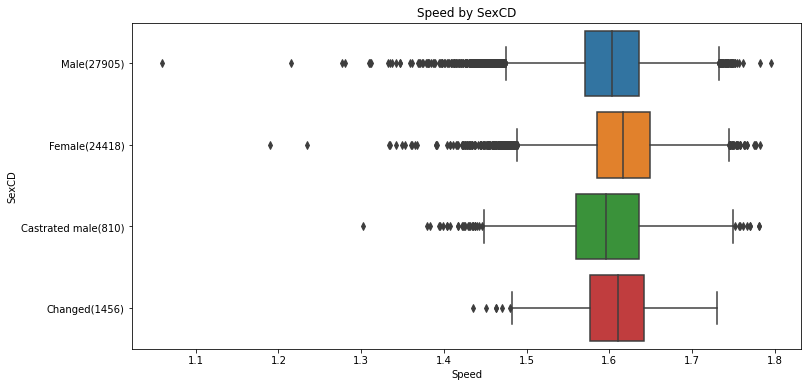

In [35]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Speed', y='SexCD', data=df_horse, orient='h')
plt.title('Speed by SexCD')
ticklabels = map_axis_ticklabels(horse_map, 'SexCD', ax, 'y', df=df_horse)

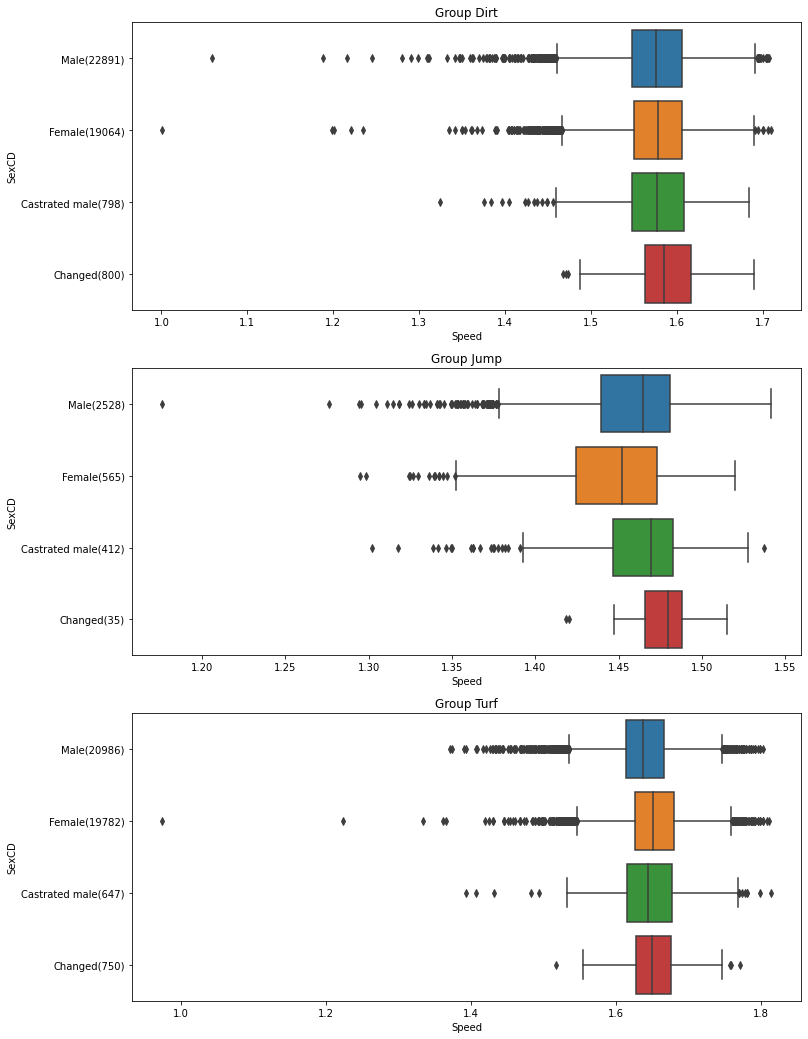

In [36]:
plt.figure(figsize=(12,df_group_trackcd.ngroups*6))
for idx, group in enumerate(groups_trackcd):
    plt.subplot(df_group_trackcd.ngroups, 1, idx+1)
    ax = sns.boxplot(data=horse_performance_groups[group], x='Speed', y='SexCD', orient='h')
    plt.title(f'Group {group}')
    ticklabels = map_axis_ticklabels(horse_map, 'SexCD', ax, 'y', df=horse_performance_groups[group])

### Product code

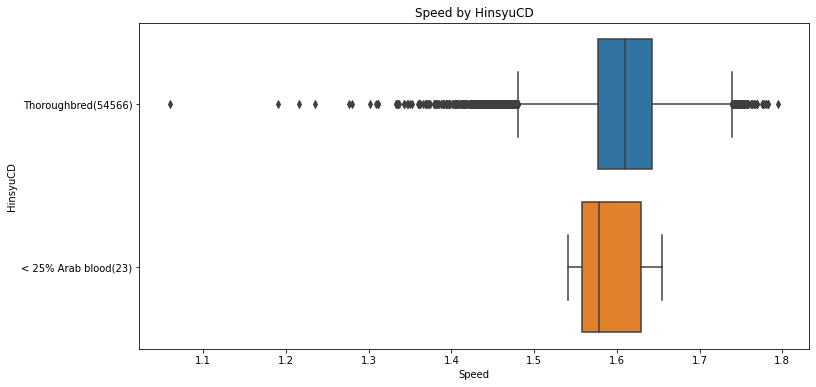

In [37]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Speed', y='HinsyuCD', data=df_horse, orient='h')
plt.title('Speed by HinsyuCD')
ticklabels = map_axis_ticklabels(horse_map, 'HinsyuCD', ax, 'y', df=df_horse)

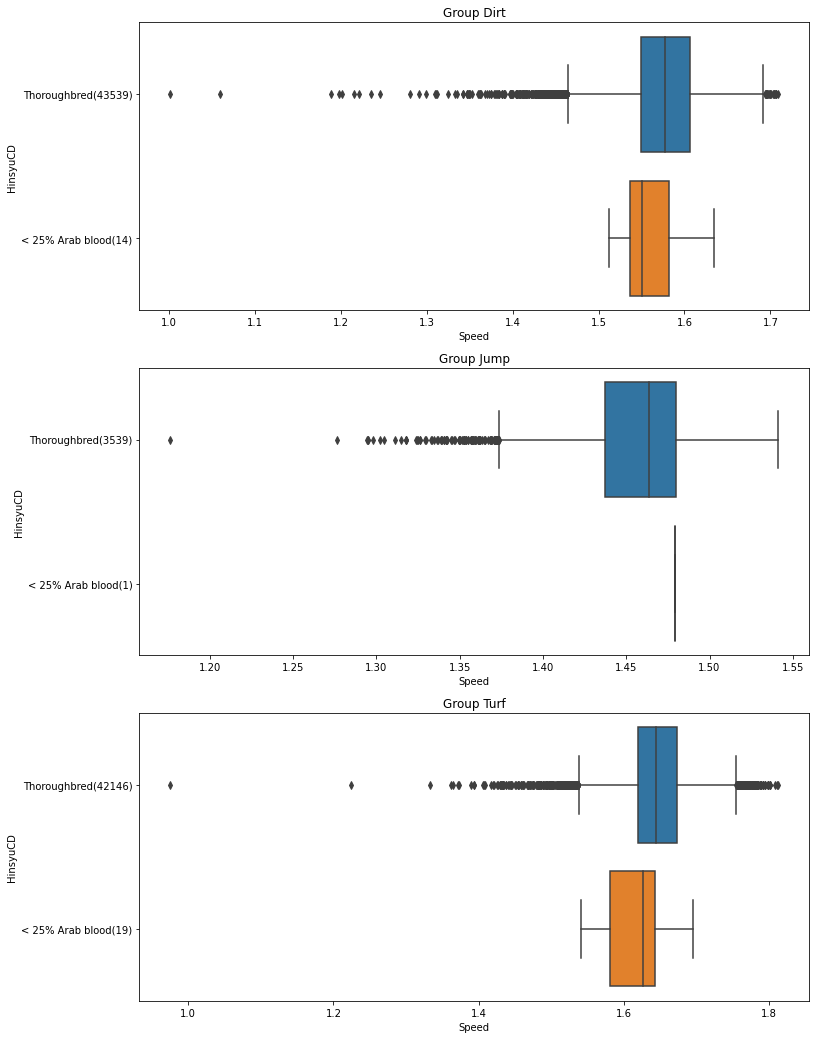

In [38]:
plt.figure(figsize=(12,df_group_trackcd.ngroups*6))
for idx, group in enumerate(groups_trackcd):
    plt.subplot(df_group_trackcd.ngroups, 1, idx+1)
    ax = sns.boxplot(data=horse_performance_groups[group], x='Speed', y='HinsyuCD', orient='h')
    plt.title(f'Group {group}')
    ticklabels = map_axis_ticklabels(horse_map, 'HinsyuCD', ax, 'y', df=horse_performance_groups[group])

### Hair color

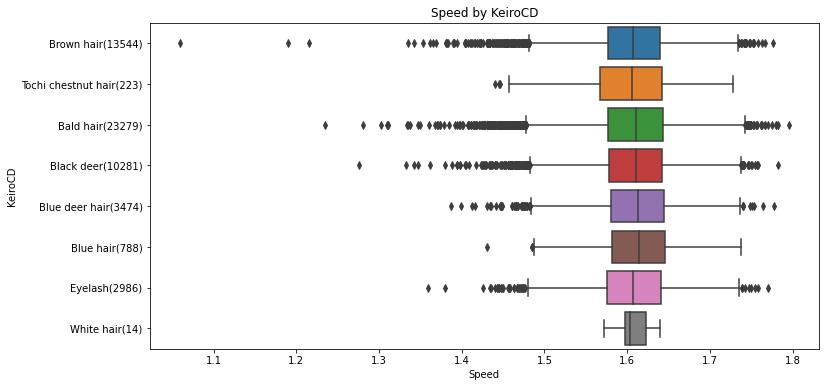

In [39]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Speed', y='KeiroCD', data=df_horse, orient='h')
plt.title('Speed by KeiroCD')
ticklabels = map_axis_ticklabels(horse_map, 'KeiroCD', ax, 'y', df=df_horse)

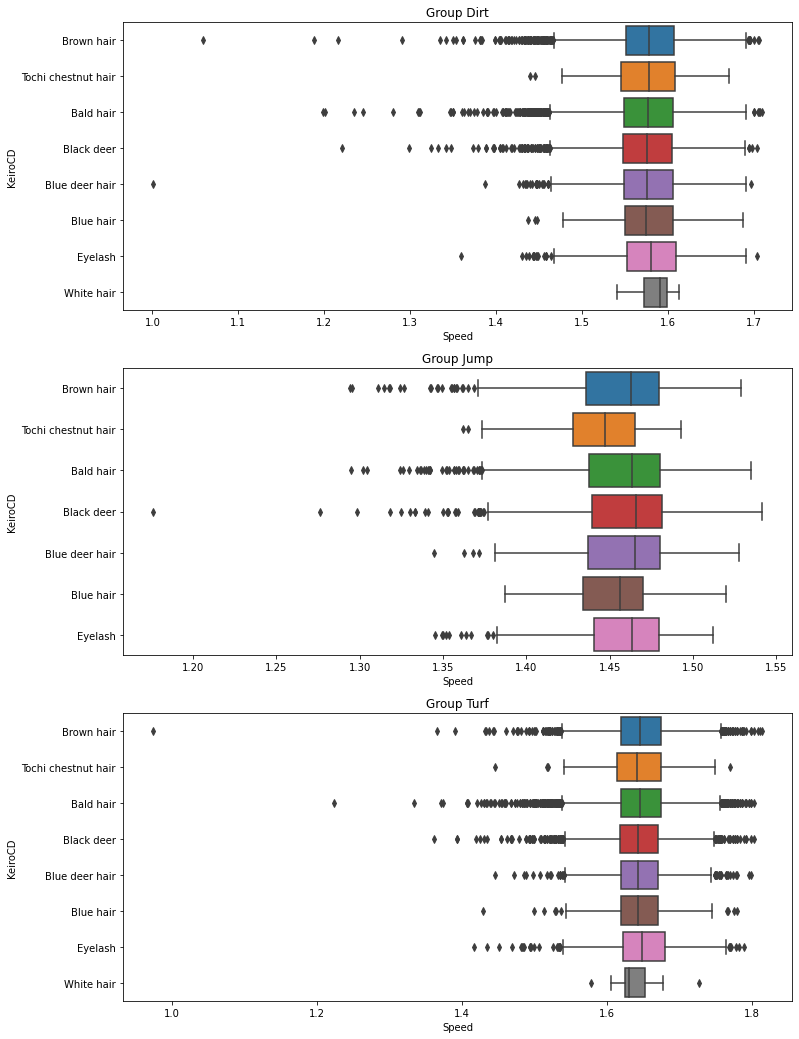

In [40]:
plt.figure(figsize=(12,df_group_trackcd.ngroups*6))
for idx, group in enumerate(groups_trackcd):
    plt.subplot(df_group_trackcd.ngroups, 1, idx+1)
    ax = sns.boxplot(data=horse_performance_groups[group], x='Speed', y='KeiroCD', orient='h')
    plt.title(f'Group {group}')
    ticklabels = map_axis_ticklabels(horse_map, 'KeiroCD', ax, 'y')

### Area

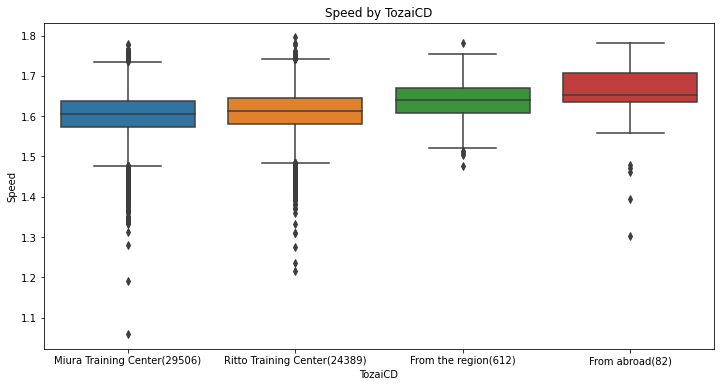

In [41]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='TozaiCD', y='Speed', data=df_horse, orient='v')
plt.title('Speed by TozaiCD')
ticklabels = map_axis_ticklabels(horse_map, 'TozaiCD', ax, 'x', df=df_horse)

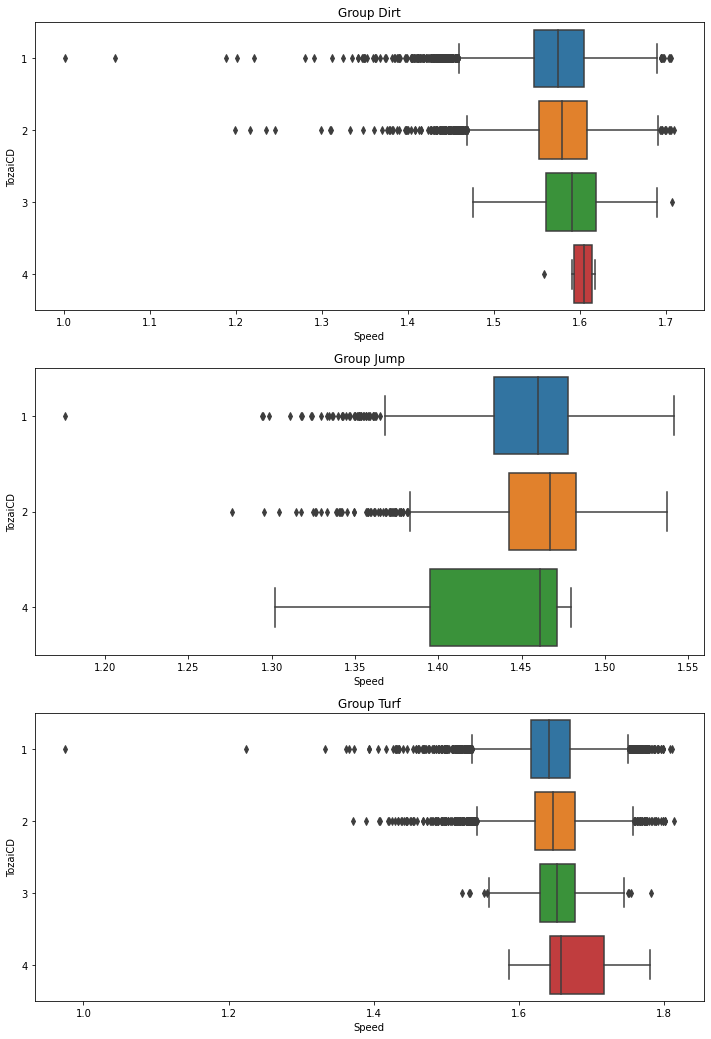

In [42]:
plt.figure(figsize=(12,df_group_trackcd.ngroups*6))
for idx, group in enumerate(groups_trackcd):
    plt.subplot(df_group_trackcd.ngroups, 1, idx+1)
    ax = sns.boxplot(data=horse_performance_groups[group], x='Speed', y='TozaiCD', orient='h')
    plt.title(f'Group {group}')

# Analyze races

In [43]:
df_race = df_valid.groupby('raceid')
more_than_3_top3 = df_race.agg({'DochakuTosu':'max'})
print('Number of races with more than 3 top 3:',(more_than_3_top3['DochakuTosu'] > 0).sum())

Number of races with more than 3 top 3: 1045


In [44]:
print('Median number of horses in a race:', num_horses_in_race.median())
num_horses_in_race.head()

Median number of horses in a race: raceid    15.0
dtype: float64


,raceid
raceid,
2008-01-05 01:06,16
2008-01-05 01:08,16
2008-01-05 02:06,16
2008-01-05 02:08,16
2008-01-05 03:06,16


In [45]:
numeric_cols = ['Time', 'Speed', 'Barei', 'Futan', 'BaTaijyu', 'Zogen', 'Kyori']
categorical_cols = [
    'Umaban',
    # 'SexCD',
    # 'HinsyuCD',
    # 'KeiroCD',
    # 'TozaiCD',
    'Blinker',
    'MinaraiCD',
    'RaceInfo$YoubiCD',
    'GradeCD',
    'JyokenInfo$JyuryoCD',
    'TrackCD',
    'TenkoBaba$TenkoCD',
    'TenkoBaba$SibaBabaCD',
    'TenkoBaba$DirtBabaCD']

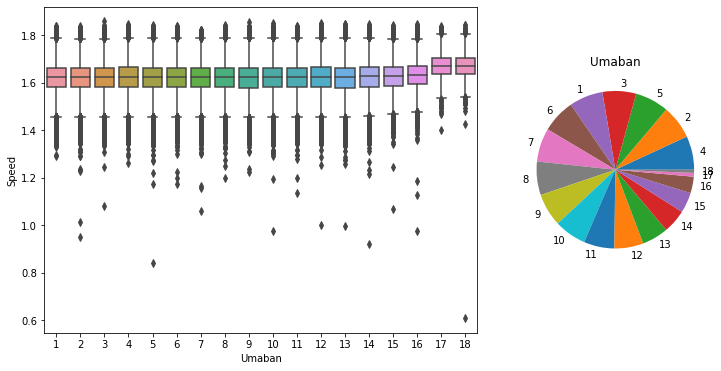

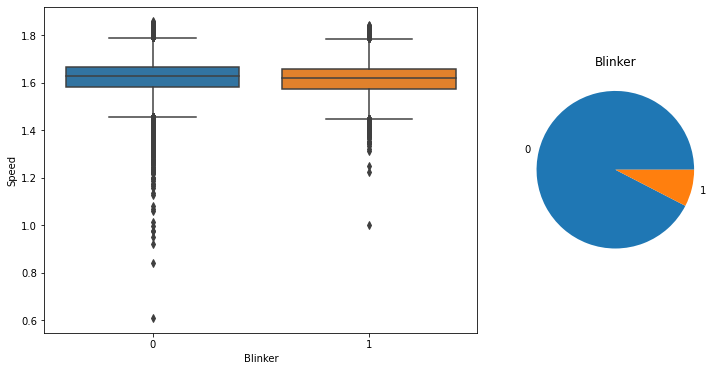

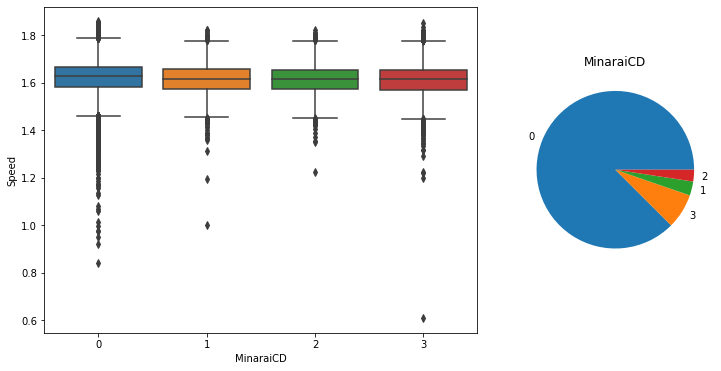

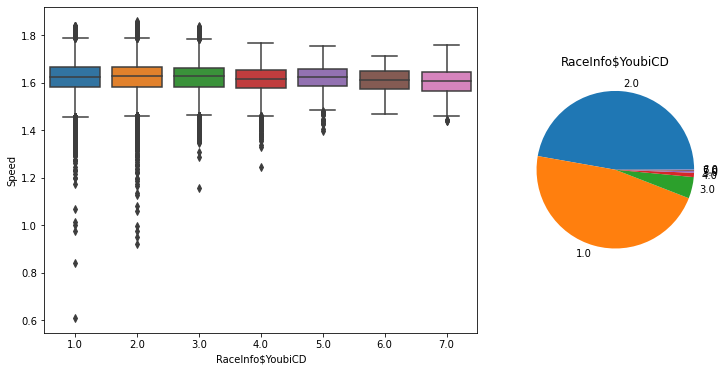

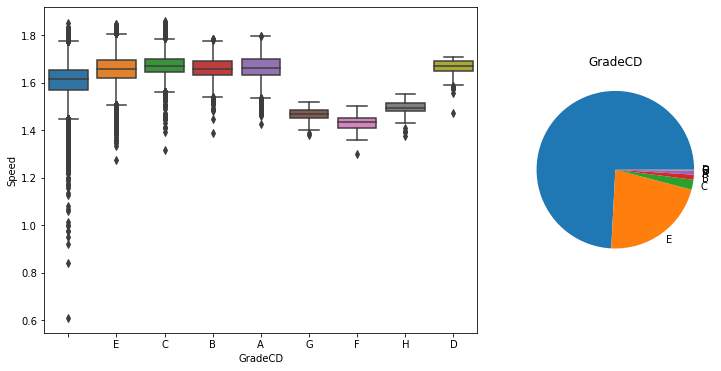

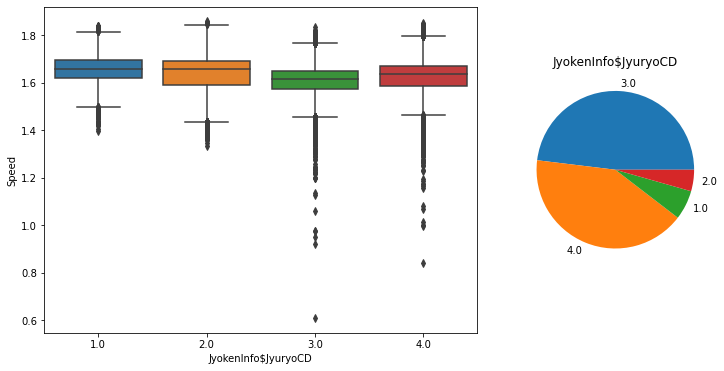

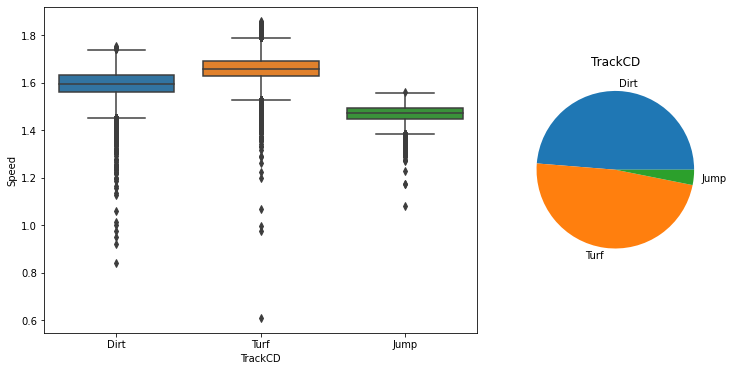

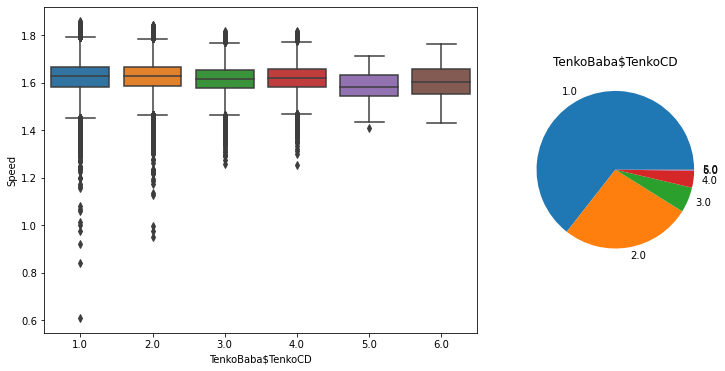

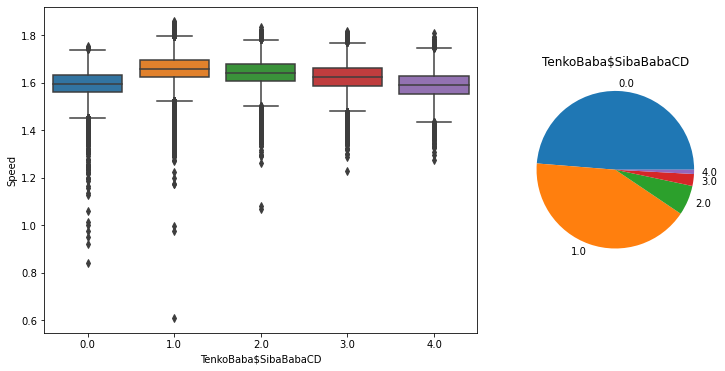

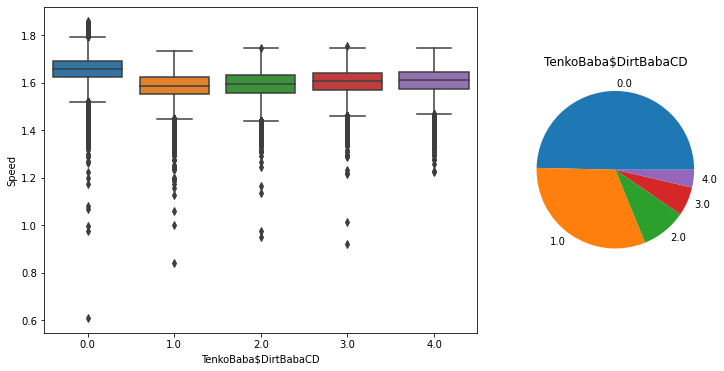

In [46]:
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    plt.subplot(1,3,(1,2))
    sns.boxplot(data=df_valid, x=col, y='Speed')
    plt.subplot(1,3,3)
    data_ = df_valid[col].value_counts()
    plt.pie(x=data_, labels=data_.index)
    plt.title(col)

Các cuộc đua vượt chướng ngại ngựa chạy chậm hơn đáng kể

G, F, H là các cuộc đua disability nên phù hợp

Các tình trạng thời tiết: ngựa chạy không tốt trong thời tiết có tuyết (snow (5))

Các tình trạng sân cỏ: ngựa chạy tốt hơn khi mặt sân cứng (firm (1))

Các tình trạng sân đất: ngựa chạy có vẻ đồng đều tại các tình trạng khác nhau

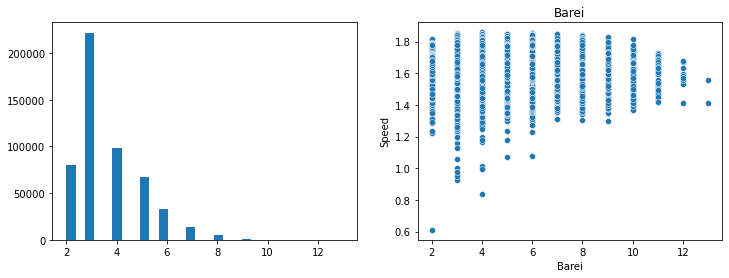

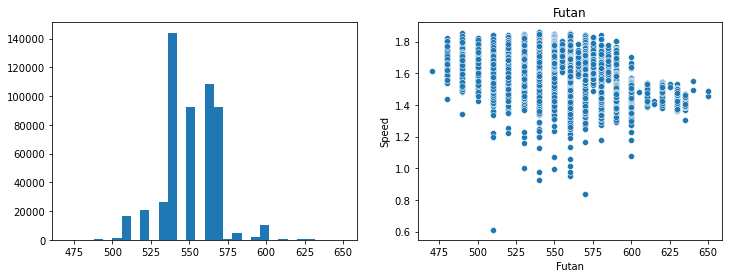

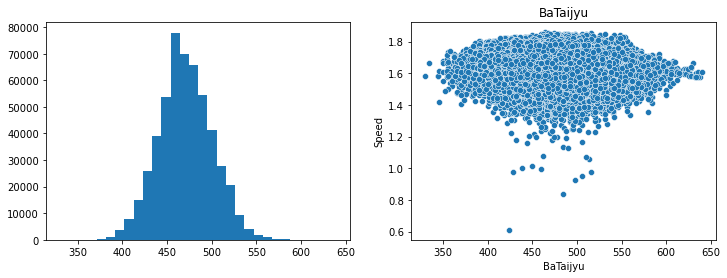

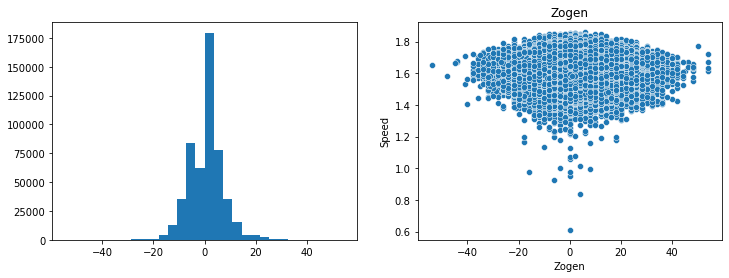

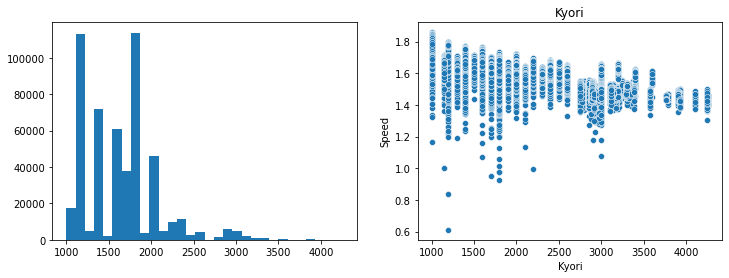

In [47]:
for col in numeric_cols[2:]:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.hist(data=df_valid, x = col, bins=30)
    plt.subplot(1,2,2)
    sns.scatterplot(data=df_valid, x = col, y='Speed')
    plt.title(col)

## Fix speed

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [25]:
X = pd.get_dummies(df_valid['TrackCD'])
X['Kyori'] = df_valid['Kyori']
y = df_valid['Speed']
model_fixed_speed = LinearRegression()
model_fixed_speed.fit(X, y)
speed_pred = model_fixed_speed.predict(X)
mean_absolute_error(y, speed_pred)

0.028127628661416985

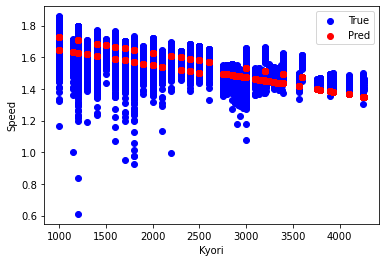

In [26]:
plt.scatter(x = 'Kyori', y = 'Speed', data=df_valid, color='b', label='True')
plt.scatter(x = df_valid['Kyori'], y = speed_pred, color='r', label='Pred')
plt.xlabel('Kyori')
plt.ylabel('Speed')
plt.legend()

In [28]:
fixed_speed_data_cols = X.columns.to_list()
with open('../src/app_data/fixed_speed_data_cols.json', 'w') as f:
    f.write(json.dumps(fixed_speed_data_cols))

In [52]:
filename = '../src/app_data/fixed_speed_model.pickle'
pickle.dump(model_fixed_speed, open(filename, 'wb'))

Text(0.5, 1.0, 'TrackCD')

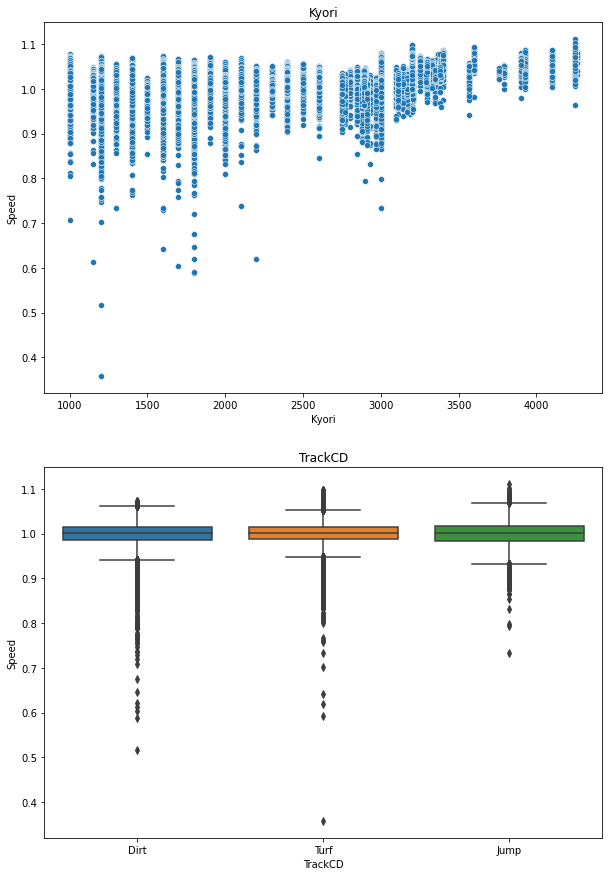

In [53]:
speed_fixed = df_valid['Speed']/speed_pred
plt.figure(figsize=(10, 15))
plt.subplot(2,1,1)
sns.scatterplot(x=df_valid['Kyori'], y=speed_fixed)
plt.title('Kyori')
plt.subplot(2,1,2)
sns.boxplot(x=df_valid['TrackCD'], y=speed_fixed)
plt.title('TrackCD')

In [29]:
X = pd.get_dummies(df['TrackCD'])
X['Kyori'] = df['Kyori']
X = X[fixed_speed_data_cols]
speed_pred = model_fixed_speed.predict(X)

In [30]:
speed_full_fixed = df['Speed']/speed_pred
df['Speed_fixed'] = speed_full_fixed
df['Speed_fixed'].replace(0., 1., inplace=True)
df['Speed_fixed'].describe()

count    525663.000000
mean          1.000002
std           0.022351
min           0.357821
25%           0.986669
50%           1.001302
75%           1.015006
max           1.110994
Name: Speed_fixed, dtype: float64

## Columns that's not analyzed

In [56]:
for col in df_origin.columns:
    if col not in essential_cols:
        print(col)

Wakuban
NyusenJyuni
ChakusaCD
ChakusaCDP
Ninki
RecordUpKubun
DMGosaP
DMGosaM
DMJyuni
KyakusituKubun
RaceInfo$TokuNum
RaceInfo$Kakko
RaceInfo$KakkoEng
RaceInfo$Kubun
RaceInfo$Nkai
JyokenInfo$SyubetuCD
JyokenInfo$KigoCD
JyokenInfo$JyokenCD$1
JyokenInfo$JyokenCD$2
JyokenInfo$JyokenCD$3
JyokenInfo$JyokenCD$4
JyokenInfo$JyokenCD$5
CourseKubunCD
Honsyokin$1
Honsyokin$2
Honsyokin$3
Honsyokin$4
Honsyokin$5
Honsyokin$6
Fukasyokin$1
Fukasyokin$2
Fukasyokin$3
Fukasyokin$4
Fukasyokin$5
TorokuTosu
SyussoTosu
NyusenTosu


### Data for reports

In [ ]:
df.to_csv(r'../reports/forPBI.csv', index=False)

# Transform data

In [57]:
categorical_cols = ['SexCD', 'HinsyuCD', 'TozaiCD', 'MinaraiCD', 'JyokenInfo$JyuryoCD', 'TrackCD']

In [58]:
dummies_df = pd.get_dummies(df[categorical_cols].astype('category'), dtype=np.float16, drop_first=False)

df = pd.concat([df, dummies_df], axis=1).drop(categorical_cols, axis=1)
df.dropna(axis=1, inplace=True)

In [59]:
print(df.shape)
df.head(2)

(525663, 48)


,raceid,Time,KakuteiJyuni,DochakuKubun,DochakuTosu,Umaban,KettoNum,UmaKigoCD,KeiroCD,Barei,BanusiCode,ChokyosiCode,Futan,Blinker,KisyuCode,BaTaijyu,Zogen,IJyoCD,Honsyokin,GradeCD,Kyori,Special race,Speed,Top 1,Top 3,Top 3 spec race,KakuteiJyuni_fixed,Speed_fixed,SexCD_1,SexCD_2,SexCD_3,HinsyuCD_1,HinsyuCD_2,TozaiCD_1,TozaiCD_2,TozaiCD_3,TozaiCD_4,MinaraiCD_0,MinaraiCD_1,MinaraiCD_2,MinaraiCD_3,JyokenInfo$JyuryoCD_1.0,JyokenInfo$JyuryoCD_2.0,JyokenInfo$JyuryoCD_3.0,JyokenInfo$JyuryoCD_4.0,TrackCD_Dirt,TrackCD_Jump,TrackCD_Turf
0,2008-01-05 01:06,752,8,0,0,1,2005107051,0,3,3,898009,437,540,0,1031,428.0,12.0,0,0,,1200.0,False,1.595745,False,False,False,47.2,0.980593,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2008-01-05 01:06,739,1,0,0,2,2005102028,0,3,3,498800,138,540,0,733,450.0,-10.0,0,50000,,1200.0,False,1.623816,True,True,False,1.0,0.997843,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [60]:
df.to_csv('../data/historical_data/cleaned_data.csv', index=False)